# <b>1 <span style='color:#37ad36'>|</span> Introduction</b>
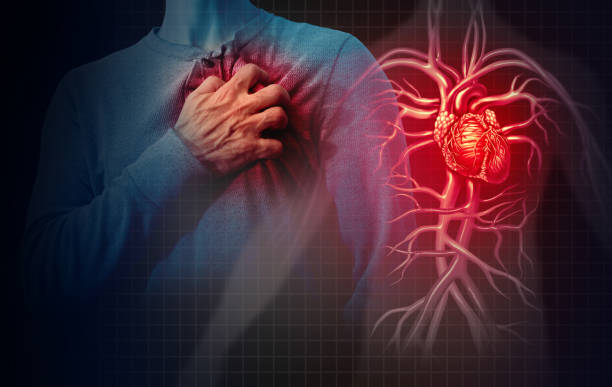

## What topic does the dataset cover?

- According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

## Objectives of the notebook:
- Explore and preprocessing the data set for classification models.

## The machine learning models used in this dataset are:
1. Decision Tree.
2. K-Nearest Neighbors (KNN).

## Explanation of the variables of the dataset
1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI : Body Mass Index (BMI).
3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke : (Ever told) (you had) a stroke?
6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
9. Sex : Are you male or female?
10. AgeCategory: Fourteen-level age category.
11. Race : Imputed race/ethnicity value.
12. Diabetic : (Ever told) (you had) diabetes?
13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth : Would you say that in general your health is...
15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma : (Ever told) (you had) asthma?
17. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer : (Ever told) (you had) skin cancer?




 






# <b>2 <span style='color:#0386f7de'>|</span> Importing libraries</b>

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

# <b>3 <span style='color:#0386f7de'>|</span> Reading the dataset</b>

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# <b>4 <span style='color:#0386f7de'>|</span> Summary Of Numerical Features</b>

In [3]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


# <b>5 <span style='color:#0386f7de'>|</span> Data Cleaning</b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

##### The output shows that we have around 319795 entries with 18  columns. No null values, and we have 14 numeric features, and 4 categorial features. We can convert the string attributes that has only two possibilities of unique values, but first let's make sure that there is no abnormal values.

In [5]:
df.nunique()


HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

#### We have some attributes that have more than two unique values, we'll use OneHotEncoder in the preprocessing step later.

In [6]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

# <b>6 <span style='color:#0386f7de'>|</span> Exploratory Analysis</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>6.1 | Visualization Of Categorical Features</b></p>
</div>. 

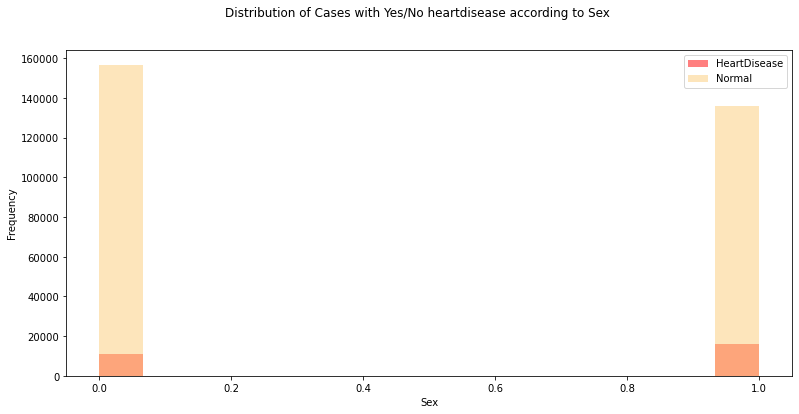

In [7]:


fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

- Remember that number one refers to men and 0 refers to women on the x-axis.
- Most cases of heart disease are men.
- Most cases that got no hart disease are women 

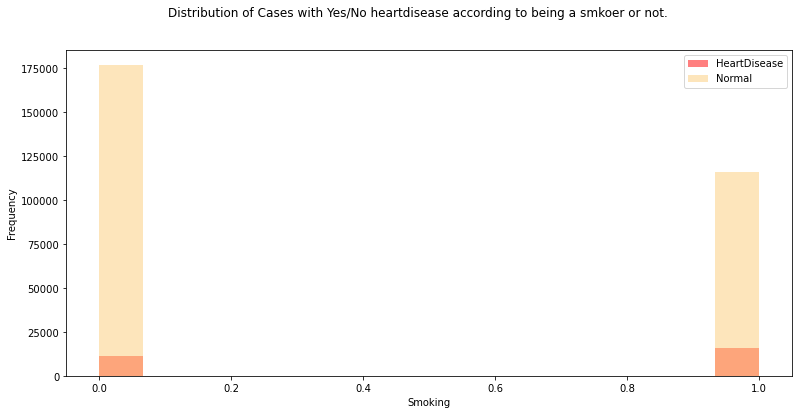

In [8]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

ax.legend();

- For smokers, they are the largest group that suffers from heart disease.
- There are also cases of heart disease, although they don't  smoke, this is related to other factors.

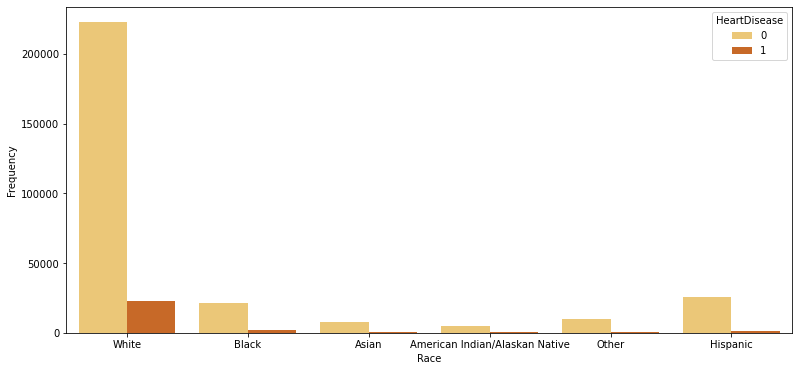

In [9]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

- 1 refers to heartdisease.
- 0 refers to normal state.
- We can see that white people are more susceptible to heart disease.

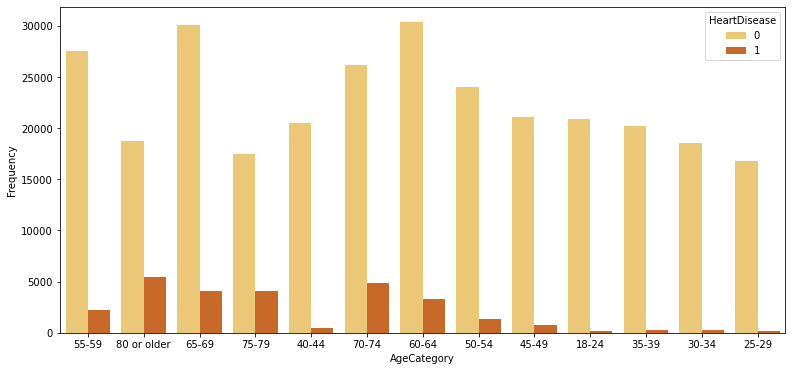

In [10]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

- We can see that people who are 80 or older are more likely to get HeartDiseases.

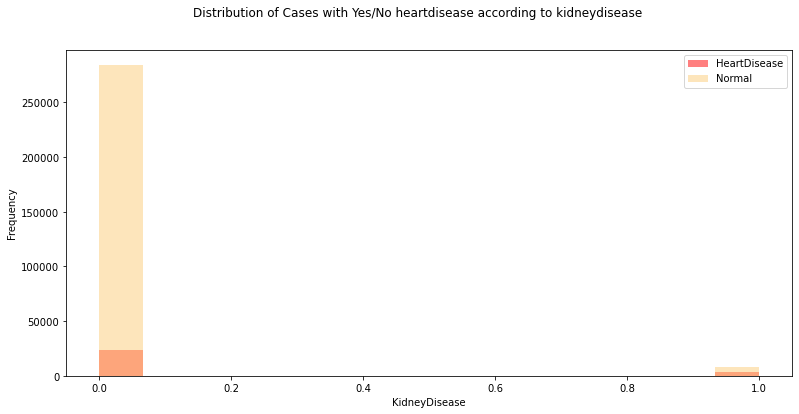

In [11]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

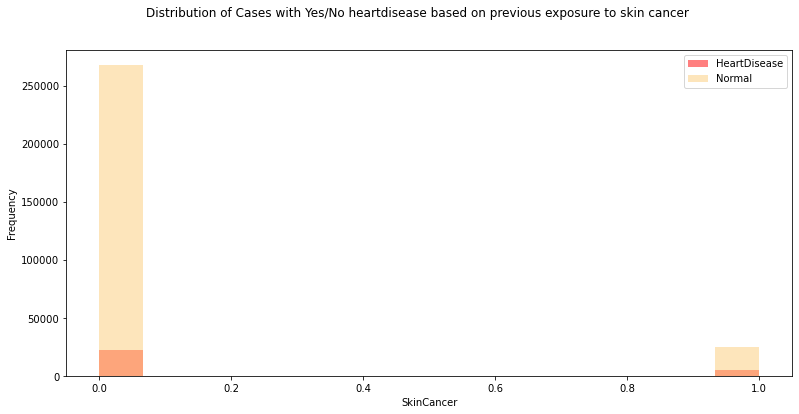

In [12]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

ax.legend();

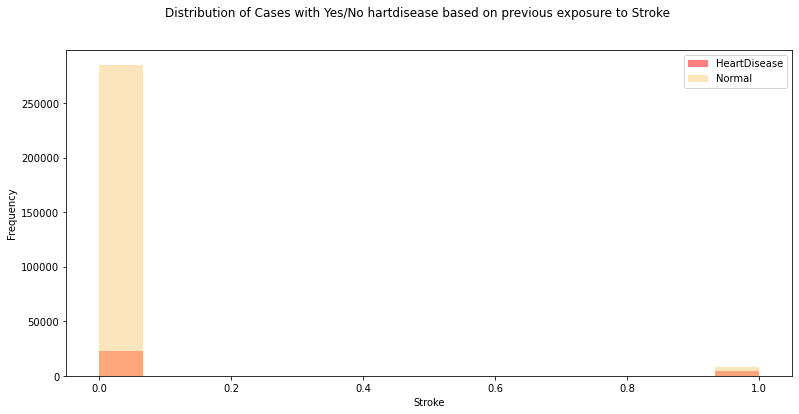

In [12]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend();

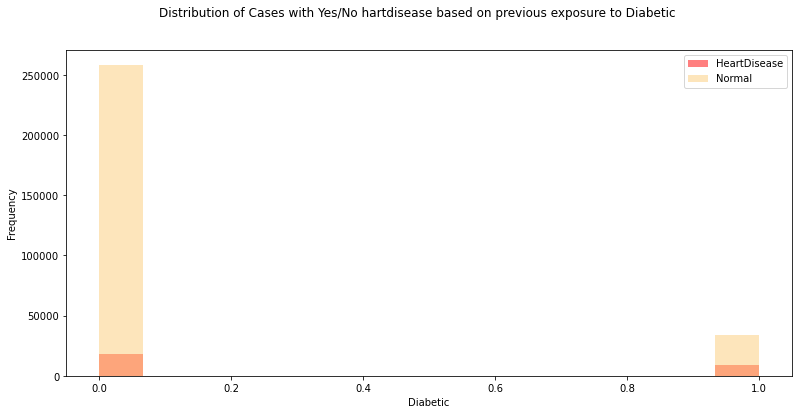

In [13]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

ax.legend();

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>6.2 | Visualization Of Numerical Features</b></p>
</div>. 

<AxesSubplot:>

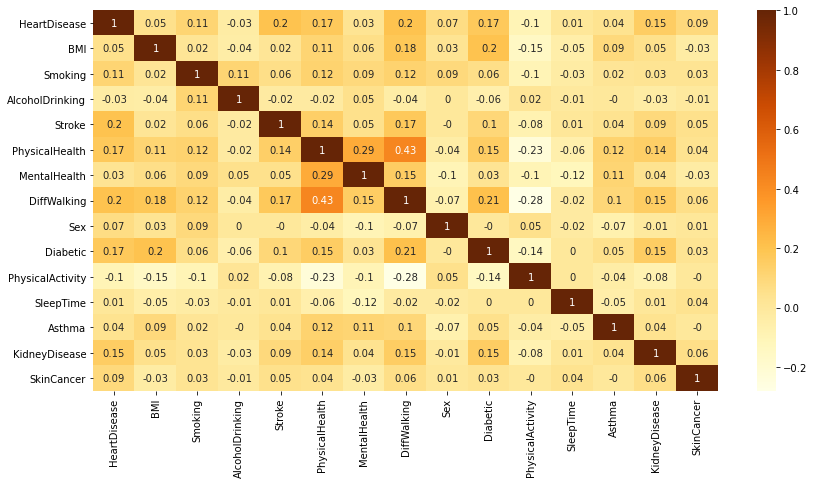

In [14]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

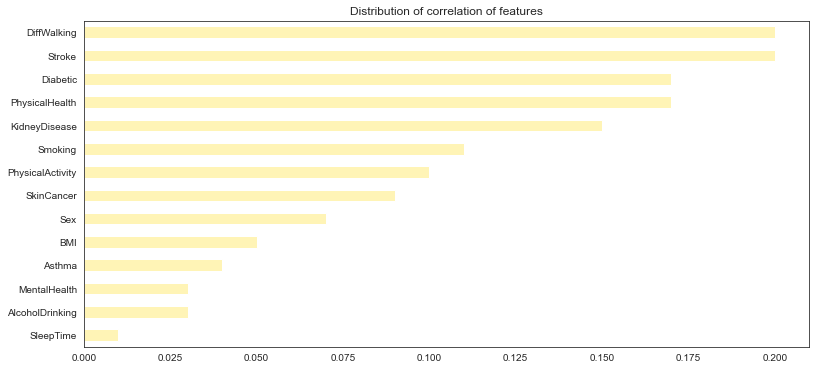

In [15]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

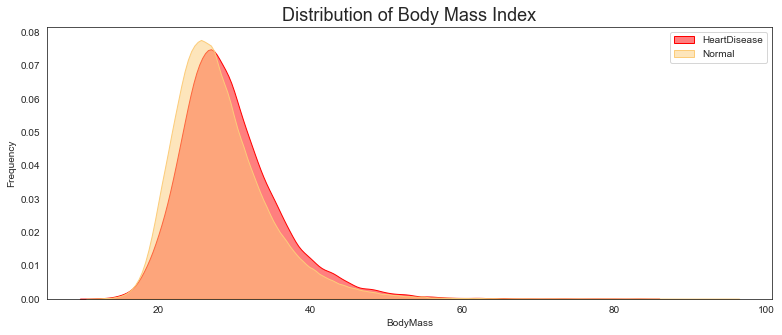

In [16]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()


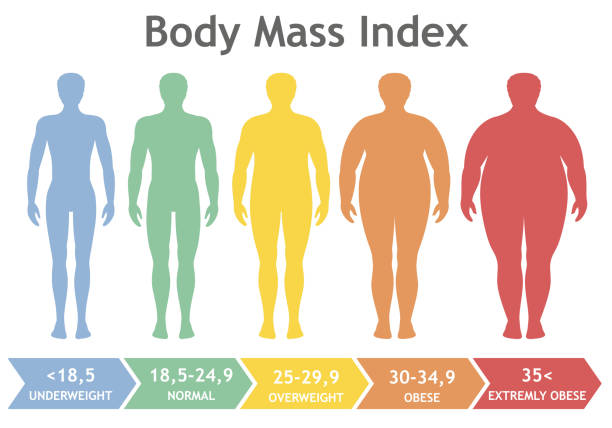

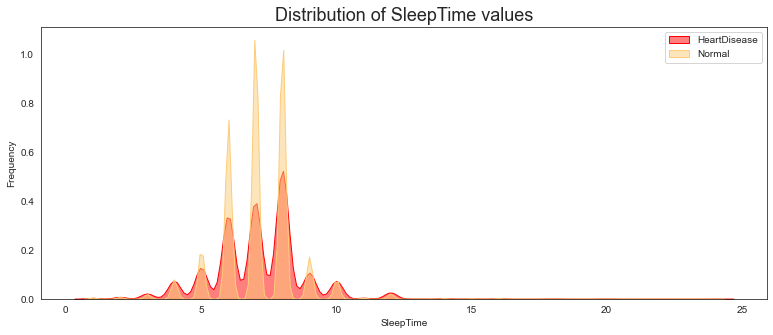

In [17]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

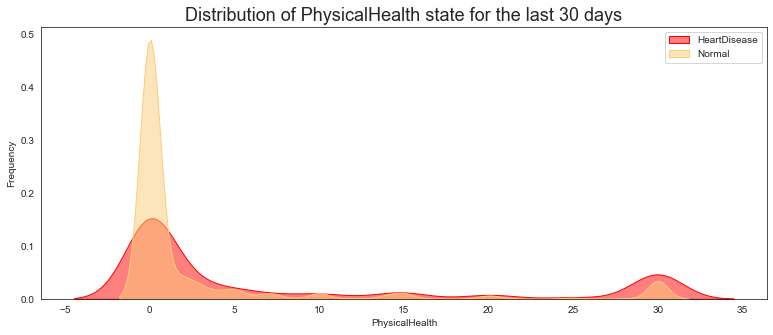

In [18]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

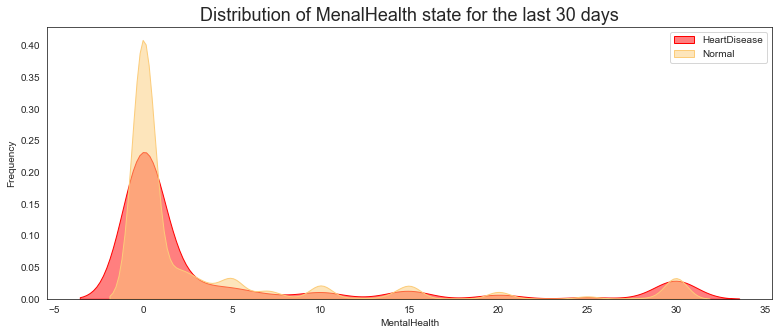

In [19]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MenalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

# <b>7<span style='color:#0386f7de'>|</span> Data Preprocessing</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>7.1 | standardization</b></p>
</div>. 

In [20]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>7.2  | Encoding</b></p>
</div>. 

In [21]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding categorical features 
categ = df[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

#Likning the encoed_cateh with the df
df = pd.concat([df, encoded_categ], axis = 1)

# Dropping the categorical features
df = df.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

# <b>8<span style='color:#0386f7de'>|</span> Split Dataset for Training and Testing</b>

In [22]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 38)
Shape of testing feature: (63959, 38)
Shape of training label: (255836,)
Shape of training label: (63959,)


# <b>9<span style='color:#0386f7de'>|</span> Modelling</b>

In [23]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>9.1 | Building Model</b></p>
</div>. 

In [24]:
# Building a model using KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.907002923748026
Precision: 0.3559127439724455
Recall: 0.11384502387073081
F1 Score: 0.17250973845297718
Cohens Kappa Score: 0.1368881630533102
Area Under Curve: 0.6997862574038449
Confusion Matrix:
 [[57391  1122]
 [ 4826   620]]


In [29]:
from sklearn import tree

# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.86560140089745
Precision: 0.2347591781744695
Recall: 0.2559676827029012
F1 Score: 0.2449051300070274
Cohens Kappa Score: 0.17129246113576335
Area Under Curve: 0.5895004835188936
Confusion Matrix:
 [[53969  4544]
 [ 4052  1394]]


In [25]:
from sklearn.linear_model import LogisticRegression

# Building  LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)

# Evaluate Model
clf1_eval = evaluate_model(clf1, X_test, y_test)

# Print result
print('Accuracy:', clf1_eval['acc'])
print('Precision:', clf1_eval['prec'])
print('Recall:', clf1_eval['rec'])
print('F1 Score:', clf1_eval['f1'])
print('Cohens Kappa Score:', clf1_eval['kappa'])
print('Area Under Curve:', clf1_eval['auc'])
print('Confusion Matrix:\n', clf1_eval['cm'])

Accuracy: 0.9161337731984552
Precision: 0.5376838235294118
Recall: 0.10741828865222182
F1 Score: 0.17906336088154273
Cohens Kappa Score: 0.1551049221808699
Area Under Curve: 0.8400979272702152
Confusion Matrix:
 [[58010   503]
 [ 4861   585]]


/Users/david/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.naive_bayes import GaussianNB

# declaring a object of GaussianNB class
clf2 =GaussianNB()
clf2.fit(X_train, y_train)

# Evaluate Model
clf2_eval = evaluate_model(clf2, X_test, y_test)

# Print result
print('Accuracy:', clf2_eval['acc'])
print('Precision:', clf2_eval['prec'])
print('Recall:', clf2_eval['rec'])
print('F1 Score:', clf2_eval['f1'])
print('Cohens Kappa Score:', clf2_eval['kappa'])
print('Area Under Curve:', clf2_eval['auc'])
print('Confusion Matrix:\n', clf2_eval['cm'])

Accuracy: 0.7140042839944339
Precision: 0.200224026883226
Recall: 0.78773411678296
F1 Score: 0.31929145579041385
Cohens Kappa Score: 0.21234023703820104
Area Under Curve: 0.8178968725959426
Confusion Matrix:
 [[41377 17136]
 [ 1156  4290]]


In [35]:
from sklearn.ensemble import RandomForestClassifier


# declaring a object of Random Forest Classifier class
clf3 =RandomForestClassifier(criterion='entropy',n_estimators=50)
clf3.fit(X_train, y_train)

# Evaluate Model
clf3_eval = evaluate_model(clf3, X_test, y_test)

# Print result
print('Accuracy:', clf3_eval['acc'])
print('Precision:', clf3_eval['prec'])
print('Recall:', clf3_eval['rec'])
print('F1 Score:', clf3_eval['f1'])
print('Cohens Kappa Score:', clf3_eval['kappa'])
print('Area Under Curve:', clf3_eval['auc'])
print('Confusion Matrix:\n', clf3_eval['cm'])

Accuracy: 0.9044387810941384
Precision: 0.3338323353293413
Recall: 0.12284245317664341
F1 Score: 0.1795973154362416
Cohens Kappa Score: 0.1402115757770156
Area Under Curve: 0.7799415181232361
Confusion Matrix:
 [[57178  1335]
 [ 4777   669]]


In [37]:
from xgboost import XGBClassifier

# making an object of the XGBoost class 
clf4 =XGBClassifier()
clf4.fit(X_train, y_train)

# Evaluate Model
clf4_eval = evaluate_model(clf4, X_test, y_test)

# Print result
print('Accuracy:', clf4_eval['acc'])
print('Precision:', clf4_eval['prec'])
print('Recall:', clf4_eval['rec'])
print('F1 Score:', clf4_eval['f1'])
print('Cohens Kappa Score:', clf4_eval['kappa'])
print('Area Under Curve:', clf4_eval['auc'])
print('Confusion Matrix:\n', clf4_eval['cm'])

/Users/david/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:52:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.915602182648259
Precision: 0.5223048327137546
Recall: 0.10319500550863019
F1 Score: 0.17233977307574364
Cohens Kappa Score: 0.14841400122913273
Area Under Curve: 0.840733453716344
Confusion Matrix:
 [[57999   514]
 [ 4884   562]]


# <b>10<span style='color:#0386f7de'>|</span> Comparison</b>

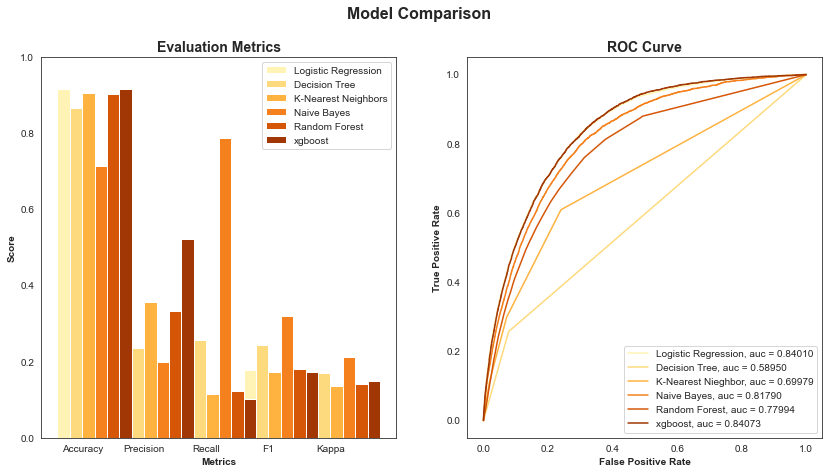

In [41]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf1_score = [clf1_eval['acc'], clf1_eval['prec'], clf1_eval['rec'], clf1_eval['f1'], clf1_eval['kappa']]
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
clf2_score = [clf2_eval['acc'], clf2_eval['prec'], clf2_eval['rec'], clf2_eval['f1'], clf2_eval['kappa']]
clf3_score = [clf3_eval['acc'], clf3_eval['prec'], clf3_eval['rec'], clf3_eval['f1'], clf3_eval['kappa']]
clf4_score = [clf4_eval['acc'], clf4_eval['prec'], clf4_eval['rec'], clf4_eval['f1'], clf4_eval['kappa']]





## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, clf1_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r4, clf2_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, clf3_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r6, clf4_score, width=barWidth, edgecolor='white', label='xgboost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf1_eval['fpr'], clf1_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(clf1_eval['auc']))
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(clf2_eval['fpr'], clf2_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(clf2_eval['auc']))
ax2.plot(clf3_eval['fpr'], clf3_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(clf3_eval['auc']))
ax2.plot(clf4_eval['fpr'], clf4_eval['tpr'], label='xgboost, auc = {:0.5f}'.format(clf4_eval['auc']))




## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [5]:
import pandas as pd
import plotly.express as px
df= pd.read_csv("heart_2020_cleaned.csv")
print(df.head())
import statsmodels.api as sm
from statsmodels.formula.api import ols

model =ols('value ~ C(treatments)',data=df_melt).fit()
anova_table =sm.stats.anova_lm(model,typ=2)
anova_table

from bioinfokit.analys import stat
res=stat()
res.anova_stat(df=df_melt,res_var='value',anova_model='value~C(treatments)')
res.anova_summary



  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

NameError: name 'df_melt' is not defined

In [ ]:
import pandas as pd
# load data file
df= pd.read_csv("heart_2020_cleaned.csv")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['BMI', 'PhysicalHealth', 'MentalHealth'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()